In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading

diabetes = pd.read_csv("diabetes-2.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

In [5]:
#finding missing values

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Initially we can't see any missing values in the dataset.
 But there is some zero values in the dataset.
 So it should be replaced with 'NaN' 
 The zero values in the columns 'Pregnancies','DiabetesPedigreeFunction','Age' and 'Outcome' has significance.
 So except these columns all other columns with zero values are replaced.

In [6]:
diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 


In [7]:
#Finding missing values again

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now we have some missing values in our dataset. All these missing values are then filled by taking their mean values

In [8]:
#Filling missing values

diabetes["Glucose"].fillna(diabetes["Glucose"].mean(), inplace = True)
diabetes["BloodPressure"].fillna(diabetes["BloodPressure"].mean(), inplace = True)
diabetes["SkinThickness"].fillna(diabetes["SkinThickness"].mean(), inplace = True)
diabetes["Insulin"].fillna(diabetes["Insulin"].mean(), inplace = True)
diabetes["BMI"].fillna(diabetes["BMI"].mean(), inplace = True)

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

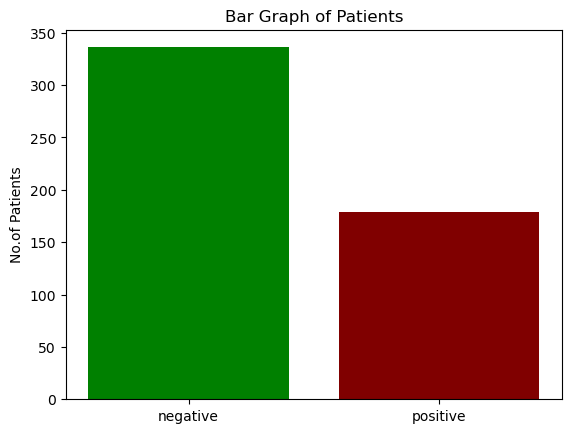

In [42]:
#assign negative and positive to a variable output
#assign the negative value and positive to a variable height
#assign green and maroon colours to a variable color

x = diabetes.Outcome.value_counts()

outputs=["negative","positive"]
height=[x[0],x[1]]
color=["green","maroon"]

#Plotting bar graph
plt.bar(outputs,x,color=color)
plt.ylabel("No.of Patients")
plt.title("Bar Graph of Patients")
plt.show()

From the above graph it is clear that patients without diabetes are more

Text(0.5, 1.0, 'Correlation Heatmap')

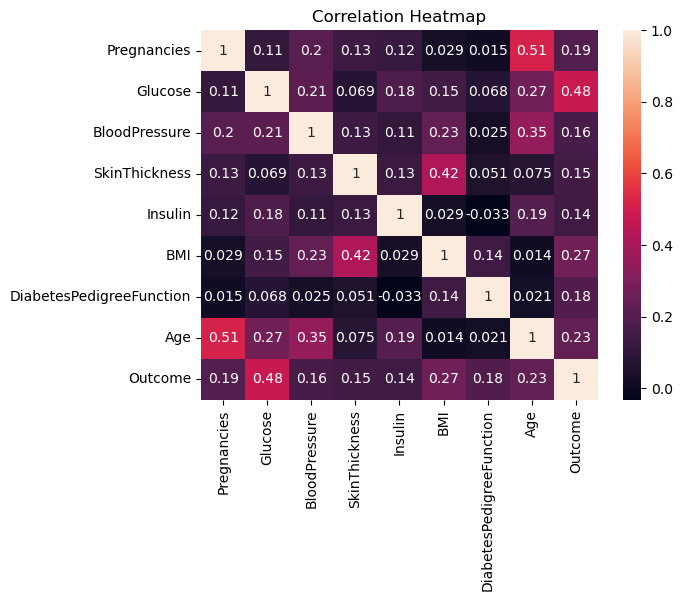

In [43]:
sns.heatmap(diabetes.corr(),annot=True)
plt.title('Correlation Heatmap')

From the correlation map it is clear that the Outcome depends more on the features Glucose and BMI

<Figure size 800x800 with 0 Axes>

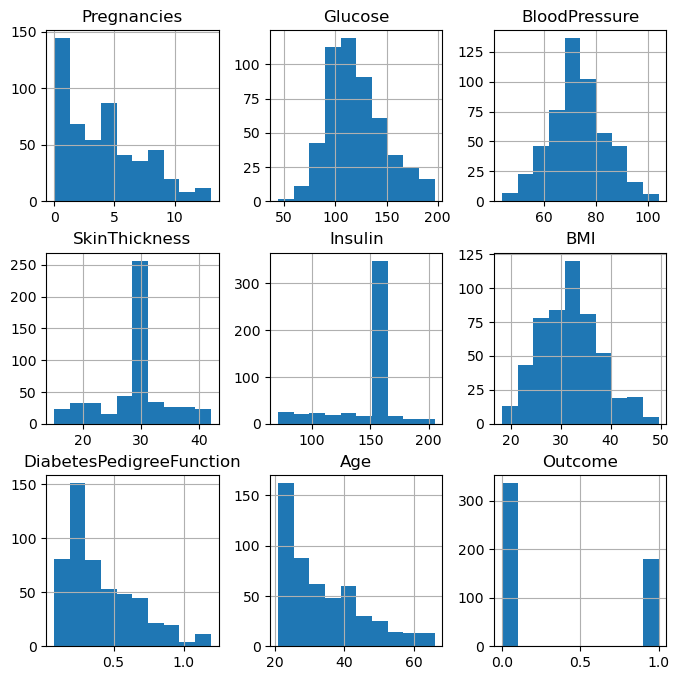

In [44]:
#plotting histograms of each columns
plt.figure(figsize=(8,8))
diabetes.hist(figsize=(8,8))
plt.show()


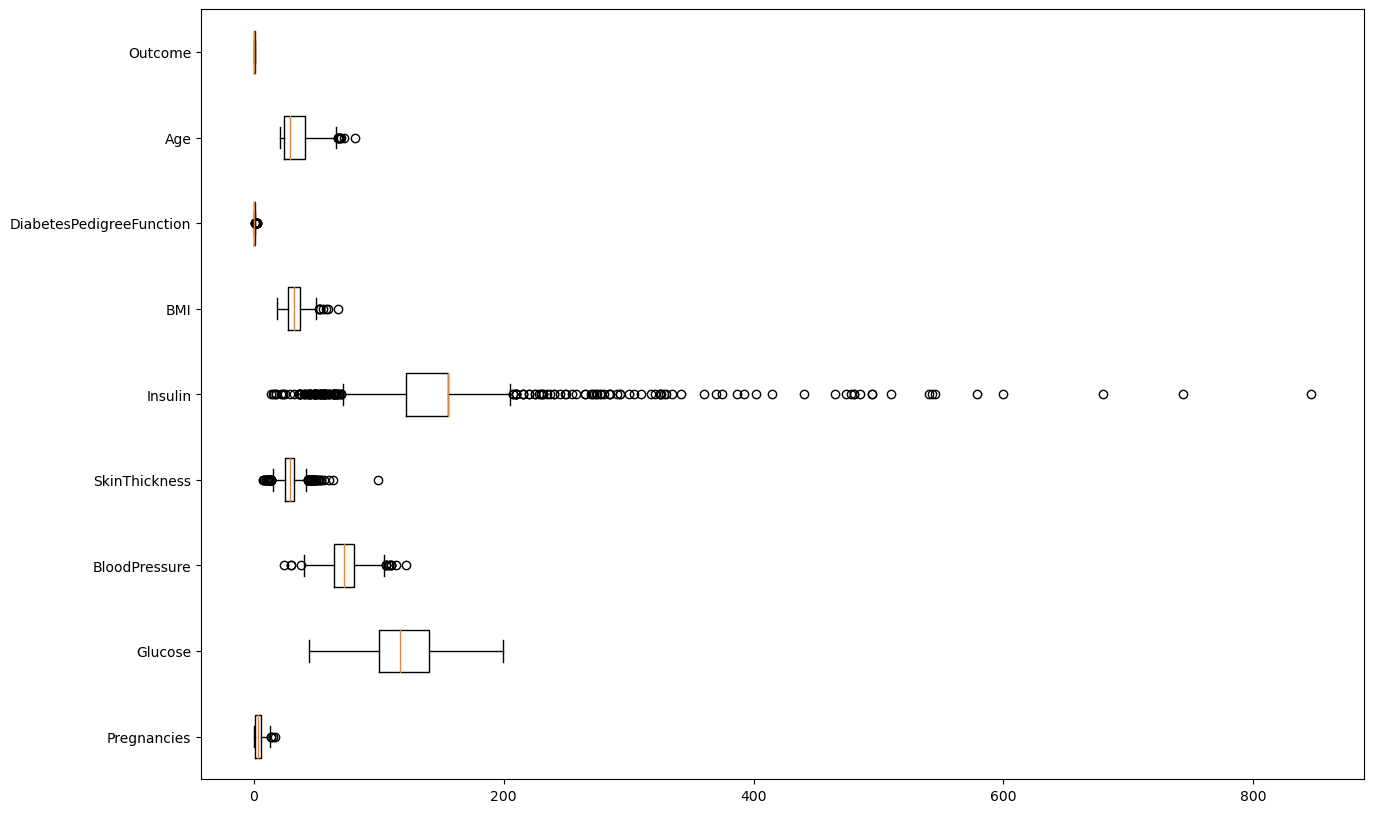

In [13]:
#Finding outliers

plt.figure(figsize=(15,10));
plt.boxplot(diabetes,labels=diabetes.columns,vert=False)
plt.show()

We can see that there are some outliers in the dataset. These outliers are removed

In [14]:
##Reference-https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python
# Removing outliers

Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1
diabetes = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) |(diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Dataset is cleaned by filling missing values and removing outliers. Then the dataset is splitted into input and output

In [15]:
#Splitting data into input and output

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [16]:
#Splitting train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state = 100)

Dataset is splitted into train and test data for Model Evaluation. 80% of data goes to train data and the remaining 20% data goes to test data

# Feature scaling

Feature Scaling is done using Standard Scalar

In [17]:
#Standard Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model Fitting 

### Logistic Regression

In [18]:
#Importing LINEAR REGRESSION from Scikit Learn and model fitting is done

from sklearn import linear_model
logr=linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [19]:
#predicting test results

prediction_test = logr.predict(X_test)
prediction_test

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

Import Confusion Matrix and Accuracy Score for evaluating the model

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [21]:
#Finding Confusion Matrix and Accuracy Score 

conf_mat = confusion_matrix(y_test,prediction_test)
print(conf_mat)
Log_accuracy = accuracy_score(y_test,prediction_test)
print(Log_accuracy)

[[65  7]
 [10 21]]
0.8349514563106796


Confusion Matrix and Accuracy of Logistic Regression Model is examined. Got 83% Accuracy for Logistic Regression Model

In [22]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        72
           1       0.75      0.68      0.71        31

    accuracy                           0.83       103
   macro avg       0.81      0.79      0.80       103
weighted avg       0.83      0.83      0.83       103



### K-Nearest Neighbors

In [23]:
#Importing K-Nearest Neighbors Classifier from Scikit Learn and model fitting is done

from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier()
kclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
#predicting test results

prediction_test = kclassifier.predict(X_test)
prediction_test

/Users/nikhilbaby/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [25]:
#Finding Confusion Matrix and Accuracy Score 

conf_mat = confusion_matrix(y_test,prediction_test)
print(conf_mat)
KNN_accuracy = accuracy_score(y_test,prediction_test)
print(KNN_accuracy)

[[57 15]
 [12 19]]
0.7378640776699029


Confusion Matrix and Accuracy of K-Nearest Neighbors Classifier is examined. Got 74% Accuracy for K-Nearest Neighbors Classifier

In [26]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        72
           1       0.56      0.61      0.58        31

    accuracy                           0.74       103
   macro avg       0.69      0.70      0.70       103
weighted avg       0.75      0.74      0.74       103



### Decison Tree

In [27]:
#Importing Decision Tree Classifier from Scikit Learn and model fitting is done

from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
#predicting test results

prediction_test = dtclassifier.predict(X_test)
prediction_test

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [29]:
#Finding Confusion Matrix and Accuracy Score 

conf_mat = confusion_matrix(y_test,prediction_test)
print(conf_mat)
DT_accuracy = accuracy_score(y_test,prediction_test)
print(DT_accuracy)

[[52 20]
 [11 20]]
0.6990291262135923


Confusion Matrix and Accuracy of Decision Tree Classifier is examined. Got 70% Accuracy for Decision Tree Classifier

In [30]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        72
           1       0.50      0.65      0.56        31

    accuracy                           0.70       103
   macro avg       0.66      0.68      0.67       103
weighted avg       0.73      0.70      0.71       103



### Random Forest 

In [31]:
#Importing Random Forest Classifier from Scikit Learn and model fitting is done

from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10)
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [32]:
#predicting test results

prediction_test = rfclassifier.predict(X_test)
prediction_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [33]:
#Finding Confusion Matrix and Accuracy Score 

conf_mat = confusion_matrix(y_test,prediction_test)
print(conf_mat)
rf_accuracy = accuracy_score(y_test,prediction_test)
print(rf_accuracy)

[[66  6]
 [13 18]]
0.8155339805825242


Confusion Matrix and Accuracy of Random Forest Classifier is examined. Got 82% Accuracy for Random Forest Classifier

In [34]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87        72
           1       0.75      0.58      0.65        31

    accuracy                           0.82       103
   macro avg       0.79      0.75      0.76       103
weighted avg       0.81      0.82      0.81       103



### Support Vector Machines

In [35]:
#Importing Support Vector Machines Classifier from Scikit Learn and model fitting is done

from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state = 0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [36]:
#predicting test results

prediction_test = classifier.predict(X_test)
prediction_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [37]:
#Finding Confusion Matrix and Accuracy Score 

conf_mat = confusion_matrix(y_test,prediction_test)
print(conf_mat)
svm_accuracy = accuracy_score(y_test,prediction_test)
print(svm_accuracy)

[[67  5]
 [ 9 22]]
0.8640776699029126


Confusion Matrix and Accuracy of Support Vector Machine Classifier is examined. Got 86% Accuracy for Support Vector Machine Classifier

In [38]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        72
           1       0.81      0.71      0.76        31

    accuracy                           0.86       103
   macro avg       0.85      0.82      0.83       103
weighted avg       0.86      0.86      0.86       103



In [39]:
# Models and thier respective Accuracy score is shown

models = pd.DataFrame({
    'Model': ['Logistic','KNN',  'Decision Tree Classifier','Random Forest','SVM'],
    'Accuracy': [ Log_accuracy,KNN_accuracy, DT_accuracy,rf_accuracy,svm_accuracy]
})

In [40]:
models.sort_values(by="Accuracy",ascending=False,inplace=True)
models

,Model,Accuracy
4,SVM,0.864078
0,Logistic,0.834951
3,Random Forest,0.815534
1,KNN,0.737864
2,Decision Tree Classifier,0.699029


Text(0, 0.5, 'Accuracy')

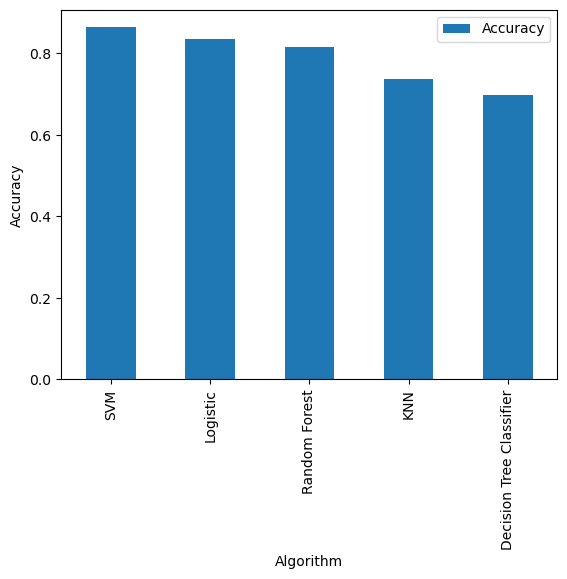

In [41]:
#plotting Models and their Accuracy Score

models.plot(kind="bar",x='Model',y='Accuracy')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")